In [1]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
import seaborn as sns
import pandas as pd
from scipy import signal
from scipy.stats import exponnorm, gamma

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [ ]:
# Look at range of durations and estimate from impulse and 1s duration regressors.

dur_vec = np.arange(0, 5, .05)
n_sim = len(dur_vec)
beta_impulse = []
res_impulse = []
beta_1s = []
res_1s = []

frame_times = np.arange(50)
scan_length = len(frame_times)
onsets = [20]
amp = 1
reg_impulse, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, .1, amp), 
                      'spm', frame_times, oversampling=16)
reg_1s, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, 1, amp), 
                      'spm', frame_times, oversampling=16)

for sim in range(0, n_sim):
    dat_loop, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, dur_vec[sim], amp), 
                      'spm', frame_times, oversampling=16)
    contrasts = np.array([[0, 1]])
    x_impulse = np.concatenate((np.ones(reg_impulse.shape),
                    reg_impulse), axis=1)
    beta_impulse_loop, _, _, pred_impulse, _  = runreg(dat_loop, x_impulse, contrasts, 
            hp_filter=True, compute_stats=True)
    x_1s = np.concatenate((np.ones(reg_impulse.shape),
                    reg_1s), axis=1)
    beta_1s_loop, _, _, pred_1s, _  = runreg(dat_loop, x_1s, contrasts, 
            hp_filter=True, compute_stats=True)
    beta_impulse.append(beta_impulse_loop)
    res_impulse.append(sum((pred_impulse - dat_loop)**2))
    beta_1s.append(beta_1s_loop)
    res_1s.append(sum((pred_1s - dat_loop)**2))



In [ ]:


plt.plot(np.array(beta_impulse)/10, dur_vec, 'o')
plt.xlabel('beta impulse regressor / 10')
plt.ylabel('Stimulus duration')
abline(1, 0)
plt.show()
plt.plot(beta_1s, dur_vec, 'o')
plt.xlabel('beta 1s duration regressor')
plt.ylabel('Stimulus duration')
abline(1, 0)
plt.show()

plt.plot(dur_vec, res_impulse, label='impulse')
plt.plot(dur_vec, res_1s, label='1s')
plt.xlabel('Stimulus duration')
plt.ylabel('Sum of squared residuals')
plt.legend(loc = 'upper left', prop={'size': 8})
plt.show()

So it seems that the 1s duration regressor is less susceptible to misfitting the data, in the range we'd expect RTs to be.  Also, the interpretation of the parameter estimate seems to match up well with the duration.  This is helpful, but I need to further understand the behavior for a range of trials with a range of RTs within a single run.  Here I only looked at a single trial.

In [ ]:
frame_times = np.arange(50)
scan_length = len(frame_times)
onsets = [20]
duration_rt1 = [2]
amplitude_1 = [1]

duration_rt2 = 1
amplitude_2 = [2]


dur_2_amp_1, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, duration_rt1, amplitude_1), 
                      'spm', frame_times, oversampling=16)
dur_1_amp_2, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, duration_rt2, amplitude_2), 
                      'spm', frame_times, oversampling=16)
plt.plot(dur_2_amp_1, label = 'Duration =2s, Amplitude = 1')
plt.plot(dur_1_amp_2, label = 'Duration =1s, Amplitude = 2')
plt.legend(loc = 'upper left', prop={'size': 8})
plt.show()


frame_times = np.arange(50)
scan_length = len(frame_times)
onsets = [20]
duration_rt1 = [1]
amplitude_1 = [1]

duration_rt2 = 1.5
amplitude_2 = [1]


reg1, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, duration_rt1, amplitude_1), 
                      'spm', frame_times, oversampling=16)
reg2, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, duration_rt2, amplitude_2), 
                      'spm', frame_times, oversampling=16)
plt.plot(reg1, label = 'RT duration')
plt.plot(reg2, label = 'Stimulus duration')
plt.legend(loc = 'upper left', prop={'size': 8})
plt.show()

np.corrcoef(reg1.T, reg2.T)


frame_times = np.arange(50)
scan_length = len(frame_times)
onsets = [20]
duration_rt1 = [1]
amplitude_1 = [1]

onsets2 = 21
duration_rt2 = .5
amplitude_2 = [1]


reg1, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets, duration_rt1, amplitude_1), 
                      'spm', frame_times, oversampling=16)
reg2, _ = hemodynamic_models.compute_regressor(
                      make_3column_onsets(onsets2, duration_rt2, amplitude_2), 
                      'spm', frame_times, oversampling=16)
plt.plot(reg1, label = 'RT duration')
plt.plot(reg2, label = 'Tail end of stimulus duration')
plt.legend(loc = 'upper left', prop={'size': 8})
plt.show()

np.corrcoef(reg1.T, reg2.T)

In [ ]:
frame_times = np.arange(100)
scan_length = len(frame_times)
onsets = np.arange(10, 50, 3)
#onsets = 10
print(onsets)
duration_rt = [2]*len(onsets)
#duration_rt = 30
print(duration_rt)
amplitude_1 = [1]*len(onsets)

des_3col = make_3column_onsets(onsets, duration_rt, amplitude_1)

reg_unconv, _ = hemodynamic_models.compute_regressor(
                      des_3col, None, frame_times, 
                      oversampling=16)
reg, _ = hemodynamic_models.compute_regressor(
                      des_3col, 'spm', frame_times, 
                      oversampling=16)

plt.plot(reg)
plt.plot(reg_unconv)
plt.show

In [ ]:
# Teasing apart possible parameter interpretation
frame_times = np.arange(500)
scan_length = len(frame_times)
onsets = np.arange(10, 480, 10)

duration_rt = gamma.rvs(a = 1.7, loc = .5, scale = .49, size = onsets.shape)
amplitude_1 = np.ones(onsets.shape)
mn_rt = np.mean(duration_rt)
#duration_cons = [mn_rt, mn_rt, mn_rt]
duration_cons = np.ones(onsets.shape)
amplitude_rt_centered = duration_rt - np.mean(duration_rt)
mn_rt_dur = np.ones(onsets.shape)*mn_rt

rt_dur_reg_info = make_3column_onsets(onsets, duration_rt, amplitude_1)
unmod_reg_info = make_3column_onsets(onsets, duration_cons, amplitude_1)
mod_rt_centered_reg_info = make_3column_onsets(onsets, duration_cons, amplitude_rt_centered)

mn_rt_dur_reg_info = make_3column_onsets(onsets, mn_rt_dur, amplitude_1)

rt_dur, _ = hemodynamic_models.compute_regressor(
                      rt_dur_reg_info, 'spm', frame_times, 
                      oversampling=16)
mn_rt_dur, _ = hemodynamic_models.compute_regressor(
                      mn_rt_dur_reg_info, 'spm', frame_times, 
                      oversampling=16)
unmod_reg, _ = hemodynamic_models.compute_regressor(
                      unmod_reg_info, 'spm', frame_times, 
                      oversampling=16)
mod_rt, _ = hemodynamic_models.compute_regressor(
                      mod_rt_centered_reg_info, 'spm', frame_times, 
                      oversampling=16)
# orthogonalize by first fitting unmod to rt_dur
x_unmod_only = sm.add_constant(unmod_reg)
#contrasts = np.array([[0, 1]])
#_, _, _, predy, _ = runreg(rt_dur, x_unmod_only, contrasts, hp_filter=False, 
#                           compute_stats=False)
contrasts = np.array([[1]])
_, _, _, predy, _ = runreg(rt_dur, unmod_reg, contrasts, hp_filter=False, 
                           compute_stats=False)
#rt_dur_orth = rt_dur - predy
rt_dur_orth_reg_info = make_3column_onsets(np.array(onsets)+1, 
                                           np.array(duration_rt)-1, amplitude_1)
rt_dur_orth, _ = hemodynamic_models.compute_regressor(
                      rt_dur_orth_reg_info, 'spm', frame_times, 
                      oversampling=16)  


bold = 100 + rt_dur*5 + np.random.normal(0, 0, (scan_length, 1))
contrasts = np.array([[1, 0], [0, 1]])
x_rt_dur = sm.add_constant(rt_dur)
con_dur_rt, t_dur_rt, p_dur_rt, mod_fit_dur_rt, _ = runreg(bold, x_rt_dur, 
                                contrasts, hp_filter=False, compute_stats=True)
print('RT dur model')
print(con_dur_rt)
#print(p_dur_rt)

contrasts = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
x_cons_rt = np.concatenate((np.ones(unmod_reg.shape), unmod_reg, rt_dur_orth), axis=1)
con_cons_rt, t_cons_rt, p_cons_rt, mod_fit_cons_rt, _ = runreg(bold, x_cons_rt, contrasts, hp_filter=False, compute_stats=True)
print('Unmodulated and Orthogonalized RT dur')
print(con_cons_rt)
#print(p_cons_rt)

x_cons_rt_mod = np.concatenate((np.ones(unmod_reg.shape), unmod_reg, mod_rt), axis=1)
con_cons_rt_mod, t_cons_rt_mod, p_cons_rt_mod, mod_fit_cons_rt_mod, _ = runreg(bold, x_cons_rt_mod, contrasts, hp_filter=False, compute_stats=True)
print('Unmodulated and RT-modulated (centered RT)')
print(con_cons_rt_mod)
#print(p_cons_rt_mod)

print(mn_rt)

fit_cons_dur_only = con_cons_rt[0] + con_cons_rt[1]*unmod_reg

#plt.plot(bold, label = 'data')
#plt.plot(mod_fit_dur_rt, label = 'model fit var epoch')
#plt.plot(mod_fit_cons_rt, label='model fit cons dur + orthog var epoch')
#plt.plot(mod_fit_cons_rt_mod, label='model fit cons dur + rt mod')
#plt.plot(fit_cons_dur_only, label='only cons dur from cons dur + rt mod')
#plt.legend(loc = 'upper left', prop={'size': 6})
#plt.show()

#plt.plot(con_dur_rt[0] + mn_rt_dur*con_dur_rt[1], 
#        label='intercept + mn rt x rt_dur (rt dur model)')
#plt.plot(fit_cons_dur_only, label = 'only cons dur from cons dur + rt mod')
#plt.legend(loc = 'upper right', prop={'size': 6})
#plt.show()





In [ ]:
def sim_est_beta_rt_shift(gamma_loc, gamma_alpha, gamma_beta, cons_dur_val, nsim):
    """
    """
    sim_out = {"beta_rt", "beta_cons_orth", "beta_rt_orth",
               "beta_cons_mod", "beta_rt_mod", "beta_cons_dur_mn_rt", "beta_rt_dur_mn_rt",
               "p_rt", "p_cons_orth", "p_rt_orth",
               "p_cons_mod", "p_rt_mod", "p_cons_dur_mn_rt", "p_rt_dur_mn_rt", "mn_rt_all"}
    output_dict = {key: [] for key in sim_out} 
    for sim in range(0, nsim):
        frame_times = np.arange(500)
        scan_length = len(frame_times)
        onsets = np.arange(10, 480, 10)
        duration_rt = gamma.rvs(a = gamma_alpha, loc = gamma_loc, scale = gamma_beta, size = onsets.shape)
        amplitude_1 = np.ones(onsets.shape)
        mn_rt = np.mean(duration_rt)
        output_dict["mn_rt_all"].append(round(mn_rt, 5))
        duration_cons = np.ones(onsets.shape)*cons_dur_val
        duration_impulse = np.ones(onsets.shape)*.1 
        amplitude_rt_centered = duration_rt - mn_rt
        mn_rt_dur = np.ones(onsets.shape)*mn_rt
        rt_dur_reg_info = make_3column_onsets(onsets, duration_rt, amplitude_1)
        unmod_mnrt_dur_reg_info = make_3column_onsets(onsets, mn_rt_dur, amplitude_1)
        imp_reg_info = make_3column_onsets(onsets, duration_impulse, amplitude_1)
        unmod_reg_info = make_3column_onsets(onsets, duration_cons, amplitude_1)
        mod_rt_centered_reg_info = make_3column_onsets(onsets, duration_cons, amplitude_rt_centered)
        
        rt_dur, _ = hemodynamic_models.compute_regressor(
                      rt_dur_reg_info, 'spm', frame_times, 
                      oversampling=16)
        imp_dur, _ = hemodynamic_models.compute_regressor(
                      imp_reg_info, 'spm', frame_times, 
                      oversampling=16)
        unmod_reg, _ = hemodynamic_models.compute_regressor(
                      unmod_reg_info, 'spm', frame_times, 
                      oversampling=16)
        unmod_mnrt_dur_reg, _ = hemodynamic_models.compute_regressor(
                      unmod_mnrt_dur_reg_info, 'spm', frame_times, 
                      oversampling=16)
        mod_rt, _ = hemodynamic_models.compute_regressor(
                      mod_rt_centered_reg_info, 'spm', frame_times, 
                      oversampling=16)
        # orthogonalize by first fitting unmod to rt_dur
        #x_unmod_only = sm.add_constant(unmod_reg)
        #contrasts = np.array([[0, 1]])
        #_, _, _, predy, _ = runreg(rt_dur, x_unmod_only, contrasts, hp_filter=False, 
        #                           compute_stats=False)
        contrasts = np.array([[1]])
        _, _, _, predy, _ = runreg(rt_dur, unmod_reg, contrasts, hp_filter=False, 
                           compute_stats=False)
        rt_dur_orth = rt_dur - predy
        # Same as above, but for mn_rt_dur regressor
        _, _, _, predy, _ = runreg(rt_dur, unmod_mnrt_dur_reg, contrasts, hp_filter=False, 
                           compute_stats=False)
        rt_dur_orth_mnrt_dur = rt_dur - predy
        # Orthogonalize in neural space (sort of)
        #rt_dur_orth_reg_info = make_3column_onsets(np.array(onsets)+cons_dur_val, 
        #                                   np.array(duration_rt)-cons_dur_val, amplitude_1)
        #
        #rt_dur_orth_reg_info = make_3column_onsets(np.array(onsets), 
        #                                   duration_rt, amplitude_1)
        #rt_dur_orth, _ = hemodynamic_models.compute_regressor(
        #              rt_dur_orth_reg_info, 'spm', frame_times, 
        #              oversampling=16)  
        bold = 100 + rt_dur*5 + np.random.normal(0, 5, (scan_length, 1))
        contrasts = np.array([[1, 0], [0, 1]])
        x_rt_dur = sm.add_constant(rt_dur)
        con_dur_rt, t_dur_rt, p_dur_rt, mod_fit_dur_rt, _ = runreg(bold, x_rt_dur, 
                                contrasts, hp_filter=False, compute_stats=True)
        output_dict["beta_rt"].append(round(con_dur_rt[1], 3))
        output_dict["p_rt"].append(p_dur_rt[1])

        contrasts = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        x_cons_rt = np.concatenate((np.ones(unmod_reg.shape), unmod_reg, rt_dur_orth), axis=1)
        con_cons_rt, t_cons_rt, p_cons_rt, mod_fit_cons_rt, _ = runreg(bold, x_cons_rt, contrasts,
                  hp_filter=False, compute_stats=True)
        output_dict["beta_cons_orth"].append(round(con_cons_rt[1], 3))
        output_dict["beta_rt_orth"].append(round(con_cons_rt[2], 3))
        output_dict["p_cons_orth"].append(p_cons_rt[1])
        output_dict["p_rt_orth"].append(p_cons_rt[2])

        x_cons_rt_mod = np.concatenate((np.ones(unmod_reg.shape), unmod_reg, mod_rt), axis=1)
        con_cons_rt_mod, t_cons_rt_mod, p_cons_rt_mod, mod_fit_cons_rt_mod, _ = runreg(bold, 
                  x_cons_rt_mod, contrasts, hp_filter=False, compute_stats=True)
        output_dict["beta_cons_mod"].append(round(con_cons_rt_mod[1], 3))
        output_dict["beta_rt_mod"].append(round(con_cons_rt_mod[2], 3))
        output_dict["p_cons_mod"].append(p_cons_rt_mod[1])
        output_dict["p_rt_mod"].append(p_cons_rt_mod[2])

        x_consmnrt_rt_mod = np.concatenate((np.ones(unmod_reg.shape),
                                           unmod_mnrt_dur_reg,
                                           rt_dur_orth_mnrt_dur), axis=1)
        con_consmnrt_rt_mod, t_consmnrt_rt_mod, p_consmnrt_rt_mod, mod_fit_consmnrt_rt_mod, _ = runreg(bold, 
                  x_consmnrt_rt_mod, contrasts, hp_filter=False, compute_stats=True)
        output_dict["beta_cons_dur_mn_rt"].append(round(con_consmnrt_rt_mod[1], 3))
        output_dict["beta_rt_dur_mn_rt"].append(round(con_consmnrt_rt_mod[2], 3))
        output_dict["p_cons_dur_mn_rt"].append(p_consmnrt_rt_mod[1])
        output_dict["p_rt_dur_mn_rt"].append(p_consmnrt_rt_mod[2])
    return output_dict


In [ ]:
#gamma fit to stroop
#(alpha=4.346889671597502, loc=0.2929374058963791, beta(scale)=0.10467336895045937)
gamma_loc = 0.5
gamma_alpha = 1.7
gamma_beta = .49
#gamma_loc = 0.5
#gamma_alpha = 4.35
#gamma_beta = .10
print(np.mean(gamma.rvs(a = gamma_alpha, loc = gamma_loc, scale = gamma_beta, size = 3000)))
cons_dur_val = 1
nsim = 1000
out = sim_est_beta_rt_shift(gamma_loc, gamma_alpha, gamma_beta, cons_dur_val, nsim)


In [ ]:
print(np.mean(np.array(out["p_rt"])<=0.05))
print(np.mean(np.array(out["p_cons_orth"])<=0.05))
print(np.mean(np.array(out["p_cons_mod"])<=0.05))
print(np.mean(np.array(out["p_cons_dur_mn_rt"])<=0.05))
print('rt regressors')
print(np.mean(np.array(out["p_rt_orth"])<=0.05))
print(np.mean(np.array(out["p_rt_mod"])<=0.05))
print(np.mean(np.array(out["p_rt_dur_mn_rt"])<=0.05))

In [ ]:

plt.hist([out["beta_rt"], out["beta_cons_orth"], out["beta_cons_mod"]],
         label=['RT duration', 'Cons orth model', 'Cons mod model'])
plt.title('Parameter estimates')
plt.legend(loc = 'upper left')
plt.show()

plt.hist([out["beta_rt"], out["beta_rt_orth"], out["beta_rt_mod"]],
         label=['RT duration', 'RT orth model', 'RT mod model'])
plt.title('Parameter estimates')
plt.legend(loc = 'upper left')
plt.show()

plt.hist(out["mn_rt_all"])
plt.title('RT distribution (mean from each simulation)')
plt.show()


print("mean RT over simulations")
print(np.mean(out["mn_rt_all"]))
#print("Activation times mean RT divided by duration of the constant reg")
#print(np.mean(out["mn_rt_all"])*5)
print("True activation")
print(np.mean(out["beta_rt"]))
print("Mean activation for cons orth model")
print(np.mean(out["beta_cons_orth"]))
print("Mean activation for cons(meanRT) orth model")
print(np.mean(out["beta_cons_dur_mn_rt"]))
print("Mean activation for cons orth model divided by mean RT")
print(np.mean(out["beta_cons_orth"])/np.mean(out["mn_rt_all"]))
print("Mean activation for cons modulation model")
print(np.mean(out["beta_cons_mod"]))
print("Mean activation for rt in orth model")
print(np.mean(out["beta_rt_orth"]))
print("Mean activation for rt in orth model (dur=mean(RT)")
print(np.mean(out["beta_rt_dur_mn_rt"]))
print("Mean activation for rt in modulation model")
print(np.mean(out["beta_rt_mod"]))

From the above I'm currently guessing the mean activation from the orthogonalization model is the true activation multiplied by the mean RT.  This will likely vary according to how long the duration of the constant duration regressor is.

In [ ]:
# Sample RT's from the RT distribution in hierarchical way. 
#  Look at within-subject R^1 and parameter estimates to see if
# they correlate with subject mean RT.  I'm using the Grinband
# settings since that's where I'm also seeing single subject power differences
# Goal is to see if misfit is present and also whether the unmodulated PEs are biased

# Hypothesis, the orthogonalized model will be perfectly fine.  I already know the RT
# modulated models will fail in some way.

n_trials = 30
scan_length = 225
repetition_time = 1
mu_grinband_shift = 642.35
inv_lambda_grinband_shift = 689.75
sigma_grinband_shift = 104.80
mu_expnorm = mu_grinband_shift
lam_expnorm = 1 / inv_lambda_grinband_shift
sigma_expnorm = sigma_grinband_shift
max_rt = 8000
min_rt = 50
event_duration = 1
beta_scales_yes = 1.5
beta_scales_no = 20
nsim = 100
center_rt=True
hp_filter = True

ISI_min = 3
ISI_max = 6
win_sub_noise_sd = 1
btwn_sub_noise_sd = 1
nsub = 30

lev1_out = lev1_many_subs(n_trials, scan_length, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd, btwn_sub_noise_sd, nsub,
              center_rt, beta_scales_yes, beta_scales_no, hp_filter)



In [ ]:
np.std(lev1_out['rt_mean'])

In [ ]:
plt.plot(lev1_out['r2']['dv_scales_yes']['Stimulus Duration'],
         lev1_out['unmod_beta_est']['dv_scales_yes']['Stimulus Duration'], 'o')      
plt.xlabel('R-squared lev1 mod')
plt.ylabel('Beta const dur reg from RTmod model')
plt.title('Scales = Yes')
plt.show()

plt.plot(lev1_out['rt_mean'],
         lev1_out['unmod_beta_est']['dv_scales_yes']['Stimulus Duration'], 'o')      
plt.xlabel('Mean RT')
plt.ylabel('Beta const dur reg from RTmod model')
plt.title('Scales = Yes')
plt.show()

plt.plot(lev1_out['r2']['dv_scales_yes']['Stimulus Duration'],
         lev1_out['rt_mean'], 'o')      
plt.xlabel('R-squared lev1 mod')
plt.ylabel('mean RT')
plt.title('Scales = Yes')
plt.show()

In [ ]:
plt.plot(lev1_out['r2']['dv_scales_yes']['Fixed event Duration and RT Duration orth'],
         lev1_out['unmod_beta_est']['dv_scales_yes']['Fixed event Duration and RT Duration orth'], 'o')      
plt.xlabel('R-squared lev1 mod')
plt.ylabel('Beta const dur reg from RT orth model')
plt.title('Scales = Yes')
plt.show()

plt.plot(lev1_out['rt_mean'],
         lev1_out['unmod_beta_est']['dv_scales_yes']['Fixed event Duration and RT Duration orth'], 'o')      
plt.xlabel('Mean RT')
plt.ylabel('Beta const dur reg from RT orth model')
plt.title('Scales = Yes')
plt.show()

plt.plot(lev1_out['r2']['dv_scales_yes']['Fixed event Duration and RT Duration orth'],
         lev1_out['rt_mean'], 'o')      
plt.xlabel('R-squared lev1 mod')
plt.ylabel('mean RT')
plt.title('Scales = Yes')
plt.show()

It doesn't make sense to look at R-squared.  At least I don't think so.  It goes up with beta no matter what and this might simply be a power thing.  

In [ ]:
#I want to estimate total within-subject variance for a beta (not just the residual variance)

out_est_win_sub_var = est_win_sub_var(n_trials, scan_length, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd, center_rt,
              beta_scales_yes, beta_scales_no, hp_filter)

print(out_est_win_sub_var)

In [13]:
#Just use the regular function for calculating power

n_trials = 30
scan_length = 225
repetition_time = 1
mu_grinband_shift = 642.35
inv_lambda_grinband_shift = 689.75
sigma_grinband_shift = 104.80
#mu_expnorm = 530
#lam_expnorm = 1 / 160
#sigma_expnorm = 77
mu_expnorm = mu_grinband_shift
lam_expnorm = 1 / inv_lambda_grinband_shift
sigma_expnorm = sigma_grinband_shift
max_rt = 8000
min_rt = 50
#max_rt = 3000
#min_rt = 0
event_duration = .5
#event_duration = .5
#beta_scales_yes = 1.5
beta_scales_yes = 5
beta_scales_no = 70
center_rt=True
hp_filter = True

ISI_min = 3
ISI_max = 6
#ISI_min = 2
#ISI_max = 2


nsim = 500
nsub = 10
win_sub_noise_sd = 2.5 # 2.5 corresponds to a within-subject beta sd of 1.5
btwn_sub_noise_sd = 5  # I think i'll go between 1-3?  With within sd = 2.5

des_sd = np.sqrt(.64)
print('ratio of total sd to within-sub sd')
print(np.sqrt((win_sub_noise_sd*des_sd)**2 + btwn_sub_noise_sd**2)/(win_sub_noise_sd*des_sd))
print('Cohens D estimate')
mfx_sd = np.sqrt((win_sub_noise_sd*des_sd)**2 + btwn_sub_noise_sd**2)
print(beta_scales_yes/mfx_sd)


ratio of total sd to within-sub sd
2.692582403567252
Cohens D estimate
0.9284766908852594


In [9]:

unmod_cor_with_rt_corplot, rtmod_cor_with_rt_corplot, unmod_p_1sampt_pow, rtmod_p_1sampt_pow = \
              many_sim_fit_group(n_trials, scan_length, repetition_time, 
              mu_expnorm, lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd, btwn_sub_noise_sd, nsub, nsim, 
              center_rt, beta_scales_yes, beta_scales_no, hp_filter)


In [10]:
power_unmod_1sampt = {key: {key2: {} for key2 in unmod_p_1sampt_pow['dv_scales_yes']} \
        for key in unmod_p_1sampt_pow}
power_rtmod_1sampt = {key: {key2: {} for key2 in rtmod_p_1sampt_pow['dv_scales_yes']} \
        for key in rtmod_p_1sampt_pow}
for i in unmod_p_1sampt_pow.keys():
        for j in unmod_p_1sampt_pow[i].keys():
            pvals_loop = np.array(unmod_p_1sampt_pow[i][j])
            power_unmod_1sampt[i][j] = np.mean(pvals_loop<0.05)
            pvals_loop = np.array(rtmod_p_1sampt_pow[i][j])
            power_rtmod_1sampt[i][j] = np.mean(pvals_loop<0.05)


print(power_unmod_1sampt)
print(power_rtmod_1sampt)

{'dv_scales_yes': {'Impulse Duration': 0.586, 'Fixed event Duration and RT Duration orth': 0.632, 'Stimulus Duration': 0.612, 'Mean RT Duration': 0.64, 'RT Duration only': 0.0, 'No RT effect': 0.488}, 'dv_scales_no': {'Impulse Duration': 0.988, 'Fixed event Duration and RT Duration orth': 0.974, 'Stimulus Duration': 0.986, 'Mean RT Duration': 0.954, 'RT Duration only': 0.0, 'No RT effect': 0.988}}
{'dv_scales_yes': {'Impulse Duration': 0.658, 'Fixed event Duration and RT Duration orth': 0.736, 'Stimulus Duration': 0.672, 'Mean RT Duration': 0.596, 'RT Duration only': 0.74, 'No RT effect': 0.0}, 'dv_scales_no': {'Impulse Duration': 0.044, 'Fixed event Duration and RT Duration orth': 0.054, 'Stimulus Duration': 0.046, 'Mean RT Duration': 0.052, 'RT Duration only': 0.246, 'No RT effect': 0.0}}


In [15]:

def plot_cor_violin(unmod_cor_with_rt_corplot, rtmod_cor_with_rt_corplot, 
                    mu_expnorm, lam_expnorm, sigma_expnorm, ISI_min, ISI_max, 
                    win_sub_noise_sd, btwn_sub_noise_sd, nsub, nsim, 
                    beta_scales_yes, beta_scales_no, hp_filter):
    unmodulated_scales_yes = pd.DataFrame(unmod_cor_with_rt_corplot['dv_scales_yes'])
    unmodulated_scales_yes['True Signal'] = 'Scales with RT'
    unmodulated_scales_no = pd.DataFrame(unmod_cor_with_rt_corplot['dv_scales_no'])
    unmodulated_scales_no['True Signal'] = 'Does not scale with RT'
    dat_unmodulated = pd.concat([unmodulated_scales_yes, unmodulated_scales_no])
    unmod_long = pd.melt(dat_unmodulated, id_vars = 'True Signal')
    unmod_long['Lower Level Estimate'] = 'Stimulus vs baseline'

    rtmodulated_scales_yes = pd.DataFrame(rtmod_cor_with_rt_corplot['dv_scales_yes'])
    rtmodulated_scales_yes['True Signal'] = 'Scales with RT'
    rtmodulated_scales_no = pd.DataFrame(rtmod_cor_with_rt_corplot['dv_scales_no'])
    rtmodulated_scales_no['True Signal'] = 'Does not scale with RT'
    dat_rtmodulated = pd.concat([rtmodulated_scales_yes, rtmodulated_scales_no])
    rtmod_long = pd.melt(dat_rtmodulated, id_vars = 'True Signal')
    rtmod_long['Lower Level Estimate'] = 'RT modulation'

    dat_long = pd.concat([rtmod_long, unmod_long])
    dat_long['Lower Level Estimate'] = \
                          dat_long['Lower Level Estimate'].astype('category')
    dat_long['Lower Level Estimate'] = \
             dat_long['Lower Level Estimate'].cat.reorder_categories(\
                 ['Stimulus vs baseline',
                 'RT modulation']) 
    cor_t_cutoff = abs(t.ppf(.025, nsub))
    cor_cutoff = cor_t_cutoff/(nsub - 2 +cor_t_cutoff**2)**.5

    sns.set_theme(style="whitegrid", font_scale=2)
    g = sns.catplot(data = dat_long, x='variable', y='value',
                hue='True Signal', row='Lower Level Estimate', kind='violin',
                palette='bright',  aspect = 5, height =4)
    g.set_ylabels('Correlation',size=30)
    g.set_xlabels('',size=30, clear_inner=False)
    titles = [r'Cor($\hat\beta_{trial}$, $RT_{WS}$)', r'Cor($\hat\beta_{RT_{BT}}$ , $RT_{WS}$)']
    for count, ax in enumerate(g.axes.flatten()):
        ax.tick_params(labelbottom=True)
        ax.axhline(0, color='black')
        ax.axhline(cor_cutoff, linestyle='dashed', color='gray')
        ax.axhline(-1*cor_cutoff, linestyle='dashed', color='gray')
        ax.set_title(titles[count])
    plt.subplots_adjust(hspace=.5)
    fig_root = Path('/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Figures/')
    plt.savefig(f"{fig_root}/rt_cor_plot_mu_{round(mu_expnorm, 2)}_laminv_{round(1/lam_expnorm, 2)}_sig_{round(sigma_expnorm, 2)}_isi_{ISI_min}_{ISI_max}_sw_{win_sub_noise_sd}_sb_{btwn_sub_noise_sd}_nsub{nsub}_byes{beta_scales_yes}_bno{beta_scales_no}_hpfilt_{hp_filter}.pdf",
            format='pdf', transparent=True, pad_inches=.5, bbox_inches='tight')
    plt.show()

In [ ]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
import seaborn as sns
import pandas as pd
from scipy import signal
from scipy.stats import exponnorm, gamma

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


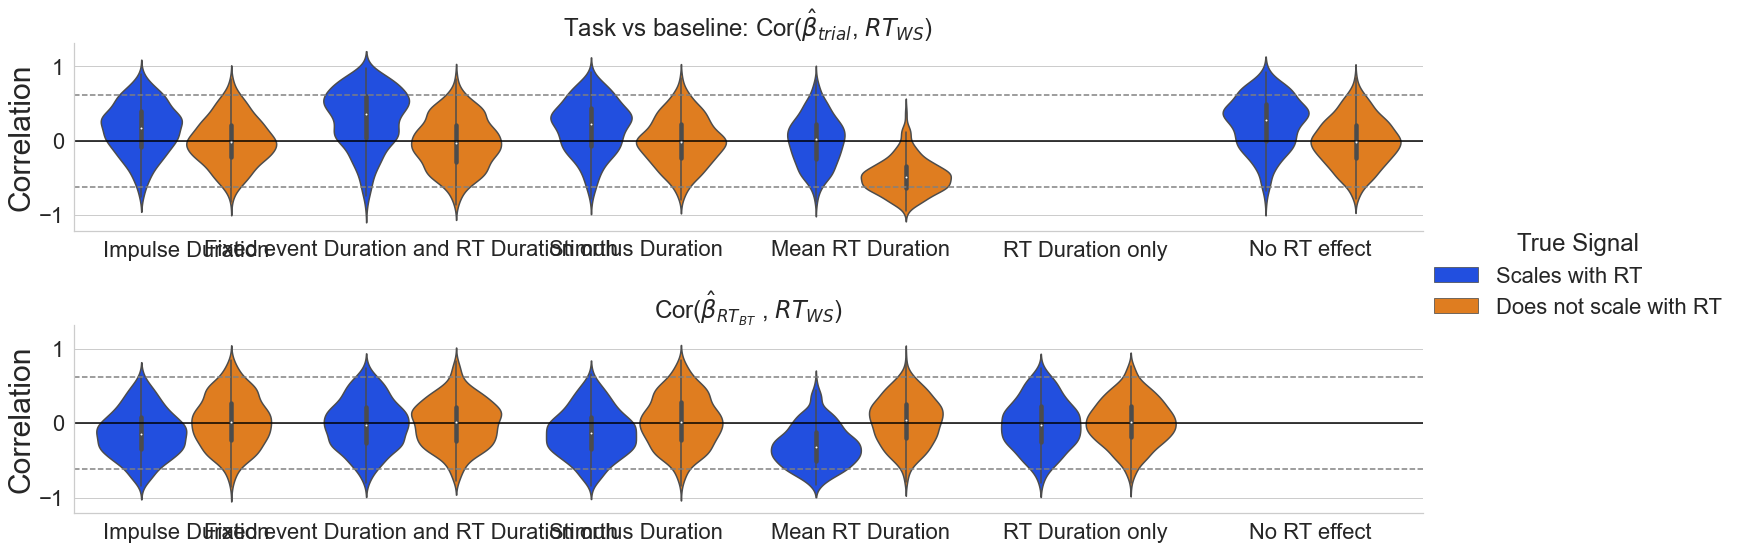

In [11]:
unmodulated_scales_yes = pd.DataFrame(unmod_cor_with_rt_corplot['dv_scales_yes'])
unmodulated_scales_yes['True Signal'] = 'Scales with RT'
unmodulated_scales_no = pd.DataFrame(unmod_cor_with_rt_corplot['dv_scales_no'])
unmodulated_scales_no['True Signal'] = 'Does not scale with RT'
dat_unmodulated = pd.concat([unmodulated_scales_yes, unmodulated_scales_no])
unmod_long = pd.melt(dat_unmodulated, id_vars = 'True Signal')
unmod_long['Lower Level Estimate'] = 'Stimulus vs baseline'

rtmodulated_scales_yes = pd.DataFrame(rtmod_cor_with_rt_corplot['dv_scales_yes'])
rtmodulated_scales_yes['True Signal'] = 'Scales with RT'
rtmodulated_scales_no = pd.DataFrame(rtmod_cor_with_rt_corplot['dv_scales_no'])
rtmodulated_scales_no['True Signal'] = 'Does not scale with RT'
dat_rtmodulated = pd.concat([rtmodulated_scales_yes, rtmodulated_scales_no])
rtmod_long = pd.melt(dat_rtmodulated, id_vars = 'True Signal')
rtmod_long['Lower Level Estimate'] = 'RT modulation'

dat_long = pd.concat([rtmod_long, unmod_long])
dat_long['Lower Level Estimate'] = \
                          dat_long['Lower Level Estimate'].astype('category')
dat_long['Lower Level Estimate'] = \
             dat_long['Lower Level Estimate'].cat.reorder_categories(\
                 ['Stimulus vs baseline',
                 'RT modulation']) 

#makeNA = ((dat_long['Lower Level Estimate'] == 
#           'Stimulus vs baseline') & \
#         (dat_long['variable'] == 'RT Duration only')) | \
#         ((dat_long['Lower Level Estimate'] == 
#           'RT modulation') & \
#         (dat_long['variable'] == 'No RT effect'))
#dat_long.loc[makeNA, 'value'] = np.nan

cor_t_cutoff = abs(t.ppf(.025, nsub))
cor_cutoff = cor_t_cutoff/(nsub - 2 +cor_t_cutoff**2)**.5

sns.set_theme(style="whitegrid", font_scale=2)
g = sns.catplot(data = dat_long, x='variable', y='value',
                hue='True Signal', row='Lower Level Estimate', kind='violin',
                palette='bright',  aspect = 5, height =4)
g.set_ylabels('Correlation',size=30)
g.set_xlabels('',size=30, clear_inner=False)
titles = [r'Task vs baseline: Cor($\hat\beta_{trial}$, $RT_{WS}$)', r'Cor($\hat\beta_{RT_{BT}}$ , $RT_{WS}$)']
for count, ax in enumerate(g.axes.flatten()):
    ax.tick_params(labelbottom=True)
    ax.axhline(0, color='black')
    ax.axhline(cor_cutoff, linestyle='dashed', color='gray')
    ax.axhline(-1*cor_cutoff, linestyle='dashed', color='gray')
    ax.set_title(titles[count])
plt.subplots_adjust(hspace=.5)
#fig_root = Path('/Users/jeanettemumford/Dropbox/Research/Talks/OHBM2021/Poster/Figures/')
#plt.savefig(fig_root / "rt_cor_plot.eps",
#            format='eps', transparent=True, pad_inches=.5, bbox_inches='tight')
plt.show()



In [ ]:

power_1sampt = {key: {key2: {} for key2 in p_val_1sampt_pow['dv_scales_yes']} \
        for key in p_val_1sampt_pow}
power_adj_1sampt = {key: {key2: {} for key2 in p_val_1sampt_pow['dv_scales_yes']} \
        for key in p_val_1sampt_pow}
for i in p_val_1sampt_pow.keys():
        for j in p_val_1sampt_pow[i].keys():
            pvals_loop = np.array(p_val_1sampt_pow[i][j])
            power_1sampt[i][j] = np.mean(pvals_loop<0.05)
            pvals_loop2 = np.array(p_val_adj_1_sampt_pow[i][j])
            power_adj_1sampt[i][j] = np.mean(pvals_loop2<0.05)


print(power_1sampt)
print(power_adj_1sampt)